<a href="https://colab.research.google.com/github/BOLLOJUAISHWARYA/DeepLearning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [ ]:
# Importing the training set  
dataset_train = pd.read_csv('/content/drive/MyDrive/Datasets/Google_Stock_Price_Train.csv')  
training_set = dataset_train.iloc[:, 1:2].values  

In [ ]:
print(dataset_train,training_set)#In training set we taking only opening value of the stock

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns] [[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [ ]:
print(dataset_train.shape,training_set.shape)

(1258, 6) (1258, 1)


In [ ]:
# Feature Scaling  
from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range = (0, 1))  
training_set_scaled = sc.fit_transform(training_set)  

In [ ]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [ ]:
X_train = []  
y_train = []  
for i in range(10, 1258):  
    X_train.append(training_set_scaled[i-10:i, 0])  
    y_train.append(training_set_scaled[i, 0])  
X_train, y_train = np.array(X_train), np.array(y_train)  

In [ ]:
print(X_train.shape,y_train.shape)

(1248, 10) (1248,)


In [ ]:
print(X_train[:1])

[[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
  0.0585423  0.06568569 0.06109085 0.06639259]]


In [ ]:
print(y_train)

[0.0614257  0.07474514 0.02797827 ... 0.95725128 0.93796041 0.93688146]


In [ ]:
# Reshaping  
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1248, 10, 1)
(1248,)


In [ ]:
# Importing the Keras libraries and packages  
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

In [ ]:
# Initialising the RNN  
regressor = Sequential()  
# Adding the first LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
regressor.add(Dropout(0.2))  
# Adding a second LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a third LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a fourth LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50))  
regressor.add(Dropout(0.2))  
# Adding the output layer  
regressor.add(Dense(units = 1))  
# Compiling the RNN  
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')  
# Fitting the RNN to the Training set  
history = regressor.fit(X_train, y_train, epochs = 100,validation_split=0.2, batch_size = 32)  

Epoch 1/100
32/32 [==============================] - 11s 77ms/step - loss: 0.0483 - val_loss: 0.0019
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 6/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0034 - val_loss: 0.0061
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 8/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 9/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0029 - val_loss: 0.001

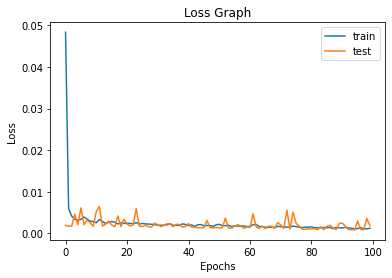

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss Graph') 
plt.xlabel('Epochs')  
plt.ylabel('Loss') 
plt.legend();

In [ ]:
# Creating a data structure with 30 timesteps and 1 output  
X_train = []  
y_train = []  
for i in range(30, 1258):  
    X_train.append(training_set_scaled[i-30:i, 0])  
    y_train.append(training_set_scaled[i, 0])  
X_train, y_train = np.array(X_train), np.array(y_train)  
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  
# Initialising the RNN  
regressor = Sequential()  
# Adding the first LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
regressor.add(Dropout(0.2))  
# Adding a second LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a third LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a fourth LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50))  
regressor.add(Dropout(0.2))  
# Adding the output layer  
regressor.add(Dense(units = 1))  
# Compiling the RNN  
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')  
# Fitting the RNN to the Training set  
history = regressor.fit(X_train, y_train, epochs = 100,validation_split=0.2, batch_size = 32)  


Epoch 1/100
31/31 [==============================] - 11s 121ms/step - loss: 0.0360 - val_loss: 0.0308
Epoch 2/100
31/31 [==============================] - 2s 68ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 3/100
31/31 [==============================] - 2s 68ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 4/100
31/31 [==============================] - 2s 67ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 5/100
31/31 [==============================] - 2s 67ms/step - loss: 0.0039 - val_loss: 0.0051
Epoch 6/100
31/31 [==============================] - 2s 68ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 7/100
31/31 [==============================] - 2s 71ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 8/100
31/31 [==============================] - 2s 69ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 9/100
31/31 [==============================] - 2s 67ms/step - loss: 0.0035 - val_loss: 0.0051
Epoch 10/100
31/31 [==============================] - 2s 67ms/step - loss: 0.0032 - val_loss: 0.00

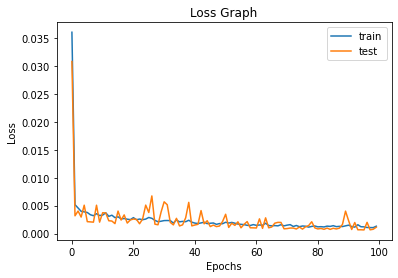

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss Graph') 
plt.xlabel('Epochs')  
plt.ylabel('Loss') 
plt.legend();

In [ ]:
# Creating a data structure with 60 timesteps and 1 output  
X_train = []  
y_train = []  
for i in range(60, 1258):  
    X_train.append(training_set_scaled[i-60:i, 0])  
    y_train.append(training_set_scaled[i, 0])  
X_train, y_train = np.array(X_train), np.array(y_train)  
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  
# Initialising the RNN  
regressor = Sequential()  
# Adding the first LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
regressor.add(Dropout(0.2))  
# Adding a second LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a third LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a fourth LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50))  
regressor.add(Dropout(0.2))  
# Adding the output layer  
regressor.add(Dense(units = 1))  
# Compiling the RNN  
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')  
# Fitting the RNN to the Training set  
history = regressor.fit(X_train, y_train, epochs = 100,validation_split=0.2, batch_size = 32)  


Epoch 1/100
30/30 [==============================] - 16s 203ms/step - loss: 0.0286 - val_loss: 0.0259
Epoch 2/100
30/30 [==============================] - 4s 130ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 3/100
30/30 [==============================] - 4s 131ms/step - loss: 0.0045 - val_loss: 0.0062
Epoch 4/100
30/30 [==============================] - 4s 136ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 5/100
30/30 [==============================] - 4s 143ms/step - loss: 0.0041 - val_loss: 0.0021
Epoch 6/100
30/30 [==============================] - 4s 130ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 7/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0042 - val_loss: 0.0019
Epoch 8/100
30/30 [==============================] - 4s 129ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 9/100
30/30 [==============================] - 4s 130ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/100
30/30 [==============================] - 4s 137ms/step - loss: 0.0040 - val_l

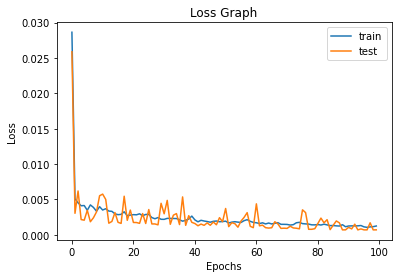

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss Graph') 
plt.xlabel('Epochs')  
plt.ylabel('Loss') 
plt.legend();

In [ ]:
# Getting the real stock price of 2017  
dataset_test = pd.read_csv('/content/drive/MyDrive/Datasets/Google_Stock_Price_Test.csv')  
real_stock_price = dataset_test.iloc[:, 1:2].values  

In [ ]:
print(dataset_test.head(5))

       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400


In [ ]:
print(dataset_test.shape,real_stock_price.shape)

(20, 6) (20, 1)


In [ ]:
# Getting the predicted stock price of 2017  
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)  
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values  
inputs = inputs.reshape(-1,1)  
inputs = sc.transform(inputs)  

In [ ]:
X_test = []  
for i in range(60, 80):  
    X_test.append(inputs[i-60:i, 0])  
X_test = np.array(X_test)  
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  
predicted_stock_price = regressor.predict(X_test)  
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  

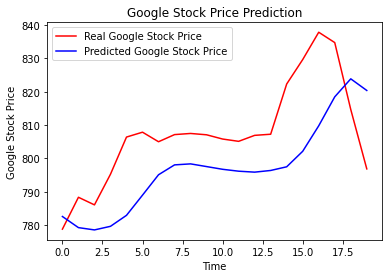

In [ ]:
# Visualizing the results  
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  
plt.title('Google Stock Price Prediction')  
plt.xlabel('Time')  
plt.ylabel('Google Stock Price')  
plt.legend()  
plt.show()  